In [51]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/Cbind.R")
source("R/library.R")
source("R/plot.R")
theme_set(theme_prism(base_size=20))
options(repr.plot.width=15, repr.plot.height=15)

In [52]:
data <- data.table::fread(file = "tidy_data_wide.csv")

In [53]:
data[, voltage := `comment on SD`]
data[, `comment on SD` := NULL]


In [54]:
panel6_data <- data[experiment=="24hr LTM GTACR",]

In [66]:
gtacr2_genotype<-"alph_prime_beta_prime_KCs>GTACR2"

In [56]:
A <- panel6_data[Genotype == "Iso31" & voltage == 4 ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
B <- panel6_data[Genotype == "Iso31" & voltage == 4.5 ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
C <- panel6_data[Genotype == "alph_prime_beta_prime_KCs>GTACR2" & voltage == 3.5 ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
D <- panel6_data[Genotype == "alph_prime_beta_prime_KCs>GTACR2" & voltage == 4 ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
E <- panel6_data[Genotype == "alph_prime_beta_prime_KCs>GTACR2" & voltage == 4.5 ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]
Dd <- D[, (delta = POST-PRE)]
Ed <- E[, (delta = POST-PRE)]
X<-Cbind(Ad, Bd, Cd, Dd, Ed)
print(
    paste(
        nrow(A),
        nrow(B),
        nrow(C),
        nrow(D),
        nrow(E)
    )
)

[1] "8 9 12 7 9"


In [57]:
data.table::fwrite(x = A, file="prism/Fig6/Figure_6A_Iso31_4.0V.csv")
data.table::fwrite(x = B, file="prism/Fig6/Figure_6A_Iso31_4.5V.csv")
data.table::fwrite(x = C, file="prism/Fig6/Figure_6A_GTACR2_3.5V.csv")
data.table::fwrite(x = D, file="prism/Fig6/Figure_6A_GTACR2_4.0V.csv")
data.table::fwrite(x = E, file="prism/Fig6/Figure_6A_GTACR2_4.5V.csv")
data.table::fwrite(x = X, file="prism/Fig6/Figure_6A_boxplot.csv")

In [58]:
panel6_data_long <- melt(panel6_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

[1] -1  1


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”


[1] -1  1


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3

$direction
[1] "horizontal"


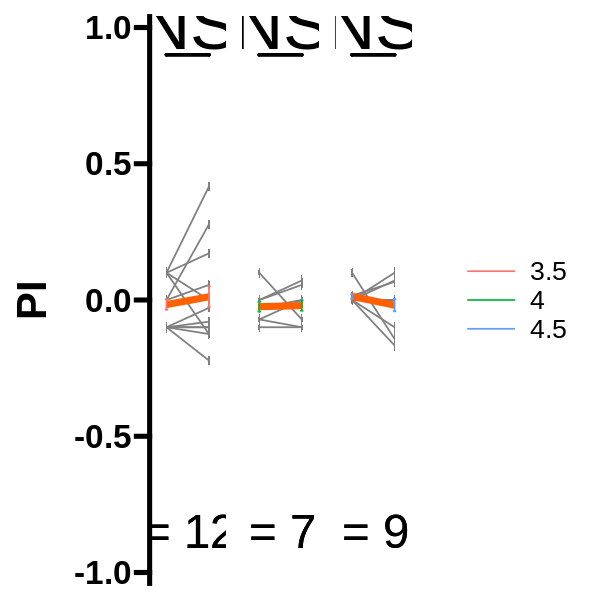

In [64]:
options(repr.plot.width=5, repr.plot.height=5)
gg1 <- learning_plot(panel6_data_long[Genotype == "Iso31",], "voltage", map_signif_level=TRUE, test=paired_t_test)
gg2 <- learning_plot(panel6_data_long[Genotype == gtacr2_genotype,], "voltage", map_signif_level=TRUE, test=paired_t_test)

In [100]:
source("R/prism_compat.R")
dt_bin <- readRDS("dt_bin_gtacr.RDS")
metadata <- dt_bin[,meta=TRUE]
dt_bin_full <- behavr::rejoin(dt_bin)

In [94]:
# dt_bin_full

In [103]:
id<-"id"
group <- "voltage"
dt_bin_full_ <- dt_bin_full[Genotype==gtacr2_genotype,]
dt_bin_full_[, voltage:=factor(voltage)]

dt_bin_full_wide <- add_ghost_data(dt_bin_full_, id=id, x="t", columns=c("asleep"), group=group, to_wide=TRUE)

dt_bin_full_wide$zt <- dt_bin_full_wide$t/3600
out <- dt_bin_full_wide[ , setdiff(colnames(dt_bin_full_wide), c("zt", "t")), with=FALSE]
print(dim(out))


A <- dt_bin_full_[voltage == 3.5, .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
B <- dt_bin_full_[voltage == 4, .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
C <- dt_bin_full_[voltage == 4.5, .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
data.table::fwrite(x = A, file="prism/Fig6/Figure_6B_GTACR2_3.5V_sleep.csv")
data.table::fwrite(x = B, file="prism/Fig6/Figure_6B_GTACR2_4.0V_sleep.csv")
data.table::fwrite(x = C, file="prism/Fig6/Figure_6B_GTACR2_4.5V_sleep.csv")
data.table::fwrite(x = out, file="prism/Fig6/Figure_6B_GTACR2_sleep.csv")


   group__ n_flies max diff
1:     3.5      20  20    0
2:       4      20  20    0
3:     4.5      10  20   10
[1] 1
[1] 1
[1] 1
[1] "3.5" "4"   "4.5"
[1] 49 20
[1] 49 20
[1] 49 20
[1] 49 60


In [104]:
source("R/prism_compat.R")
dt_bin_full_ <- dt_bin_full[Genotype=="Iso31",]
dt_bin_full_[, voltage:=factor(voltage)]

dt_bin_full_wide <- add_ghost_data(dt_bin_full_, id=id, x="t", columns=c("asleep"), group=group, to_wide=TRUE)

dt_bin_full_wide$zt <- dt_bin_full_wide$t/3600
out <- dt_bin_full_wide[ , setdiff(colnames(dt_bin_full_wide), c("zt", "t")), with=FALSE]
print(dim(out))


B <- dt_bin_full_[voltage == 4, .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
C <- dt_bin_full_[voltage == 4.5, .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
data.table::fwrite(x = B, file="prism/Fig6/Figure_6B_Iso31_4.0V_sleep.csv")
data.table::fwrite(x = C, file="prism/Fig6/Figure_6B_Iso31_4.5V_sleep.csv")
data.table::fwrite(x = out, file="prism/Fig6/Figure_6B_Iso31_sleep.csv")


   group__ n_flies max diff
1:       4      10  10    0
2:     4.5      10  10    0
[1] 1
[1] 1
[1] "4"   "4.5"
[1] 49 10
[1] 49 10
[1] 49 20


In [106]:
head(dt_bin_full_wide$zt)

[1] 5.0 5.5 6.0 6.5 7.0 7.5